In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt
from urllib.request import urlretrieve

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data= Path('data')
path_data.mkdir(exist_ok=True)
path_gz=path_data/'mnist.pkl.gz'
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [3]:
!ls data

mnist.pkl.gz


In [4]:
with gzip.open(path_gz, 'rb') as f: content = pickle.load(f, encoding='latin-1')

In [5]:
((x_train, y_train), (x_valid, y_valid), _) = content

In [6]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [7]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        # the loop executes one iteration at a time as needed.
        # print ('hello') # this would say hello every time the outside code which is iterating over the generator iterates,
        # but not when chunks is called to create the generator.
        yield x[i:i+sz]

In [8]:
c=chunks(vals, 5)
list(c) 

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

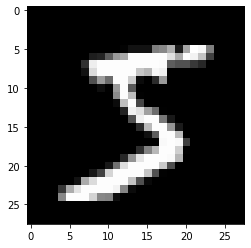

In [9]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1,28)))

In [10]:
from itertools import islice
it = iter(vals)

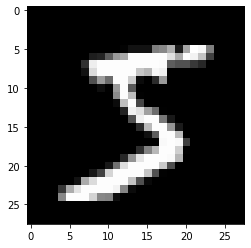

In [11]:
# returns an iterator of the next values over the iterator it's given
type(islice(it, 5)),vals,list(islice(it, 5))
it = iter(lst1)

def f1():
    #print('f1')
    return list(islice(it, 28))

# to get each next value, calls the lambda on demand, and terminates when the sentinel value ([]) gets returned by the lambda
# it would print 'f1' along each iteration over it2 after it2 is created
it2 = iter(lambda: f1(), [])
img= list(it2)
plt.imshow(img)

In [12]:
class Matrix:
    def __init__(self, data):
        self.data = data
    def __getitem__(self, index):
        return self.data[index[0]][index[1]]

In [13]:
m = Matrix(img)
m[20,15]

0.98828125

In [14]:
import torch
from torch import tensor

In [15]:
tensor([1,2,3])

tensor([1, 2, 3])

In [16]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

In [17]:
imgs=x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

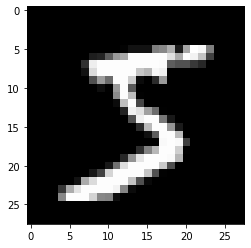

In [18]:
plt.imshow(imgs[0])

In [19]:
#scalars are 0-rank tensors
imgs[0,20,15],imgs[0,20,15].shape

(tensor(0.9883), torch.Size([]))

## Random numbers

In [20]:
# returns tuple (x//y, x%y)

# // is floor division, % is "the remainder over top of the nearest multiple of y"
divmod(101,3) # = (33, 2)

(33, 2)

In [21]:
# wichmann hill algorithm
rnd_state = None
def seed(a):
    global rnd_state
    a,x = divmod(a, 30268)
    a,y = divmod(a, 30306)
    a,z = divmod(a, 30322)
    rnd_state=int(x)+1, int(y)+1, int(z) + 1

In [22]:
seed(42)
rnd_state

(43, 1, 1)

In [23]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30306
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30323 + z/30323) % 1.0

In [24]:
# demo that in both above implementation and pytorch, different threads share same seed and will generate same stream of random numbers
if os.fork():
    print(f'parent: rand {rand()}')
else:
    print(f'child: rand {rand()}')
    os._exit(os.EX_OK)

parent: rand 0.25420036860679573
child: rand 0.25420036860679573


In [25]:
if os.fork():
    print(f'parent: rand {torch.rand(1)}')
else:
    print(f'child: rand {torch.rand(1)}')
    os._exit(os.EX_OK)

parent: rand tensor([0.9103])
child: rand tensor([0.9103])


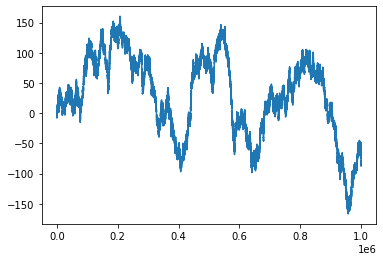

In [26]:
# a random walk graphed
def summed():
    s=0
    for _ in range(1000000):
        s = s + rand() - 0.5
        yield s
g = summed()
plt.plot(list(g))

(array([ 9959.,  9888., 10102.,  9853., 10092.,  9923.,  9959.,  9902.,
        10106.,  9982., 10060.,  9963.,  9940.,  9947., 10022.,  9878.,
         9989.,  9981., 10122.,  9881.,  9898., 10107., 10082., 10119.,
         9994., 10099., 10010.,  9971., 10011., 10126., 10137., 10039.,
        10139., 10084., 10052.,  9984.,  9894.,  9925.,  9832., 10035.,
         9950., 10107., 10104., 10137., 10013., 10055., 10152., 10092.,
         9916., 10081.,  9961.,  9946.,  9947., 10001., 10016.,  9975.,
        10036.,  9849.,  9977.,  9864., 10020.,  9951.,  9887.,  9943.,
         9862., 10132.,  9941., 10050.,  9996.,  9982.,  9968.,  9897.,
         9950.,  9901., 10030., 10116., 10077.,  9954.,  9861.,  9944.,
         9933., 10078.,  9948., 10015., 10058., 10005., 10120., 10050.,
         9958., 10082., 10026., 10095.,  9901., 10102., 10043.,  9973.,
        10003.,  9957., 10101.,  9824.]),
 array([2.56033990e-07, 1.00002446e-02, 2.00002332e-02, 3.00002217e-02,
        4.00002103e-02

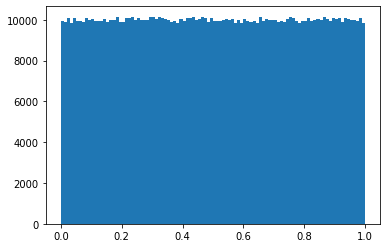

In [27]:
# uniformly distributed between 0 and 1
plt.hist([rand() for _ in range(1000000)],bins=100)

## matrix multiplication

In [28]:
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [29]:
m1 = x_valid[:5] # minibatch of first 5 image vectors
m2 = weights
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [30]:
# for matrices a and b
ar,ac=m1.shape
br,bc=m2.shape
ar,ac,br,bc

(5, 784, 784, 10)

In [31]:
res = torch.zeros(ar,bc)

In [32]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac): # ac must == br, so k indexes into cols of a as well as rows of b
            res[i,j] += m1[i,k] * m2[k,j] # a contributes to rows of result, b contributes to cols of result

In [33]:
res.shape

torch.Size([5, 10])

In [34]:
torch.set_printoptions(precision=2,linewidth=140,sci_mode=False)

In [35]:
def matmul(a, b):
    ar,ac=a.shape
    br,bc=b.shape
    res=torch.zeros(ar,bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # ac must == br, so k indexes into cols of a as well as rows of b
                res[i,j] += m1[i,k] * m2[k,j] # a contributes to rows of result, b contributes to cols of result
    return res

In [36]:
%time matmul(m1,m2)

CPU times: user 575 ms, sys: 502 µs, total: 576 ms
Wall time: 575 ms


tensor([[  2.38,  -2.06,  -4.60,  12.41,   5.56,  -5.69, -10.71,  -1.47,  20.17,   1.06],
        [ -5.77,  -0.10,  -3.37,  -1.71,   0.87,  -2.71,  -5.05,  -2.59,  11.72,  -3.89],
        [ -7.39,   6.97,  -1.04, -13.09,   8.85,   3.69,  -3.53,   2.07,  17.92,  -0.34],
        [  1.91,   0.72,  -0.13,  -4.14,   3.02, -13.71,  -4.29,  -1.45,   7.97,  14.81],
        [ -1.91,  19.00,   0.19,  -5.50,   4.77,   0.96,   5.76,  -0.22,  11.18,   2.68]])

In [37]:
pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.8 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 32.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
from numba import njit
@njit
def dot(a,b):
    res=0.
    for i in range(len(a)):
        res += a[i] * b[i]
    return res

In [39]:
from numpy import array
%time dot(array([1., 2., 3.]), array([4., 5., 6.]))

CPU times: user 596 ms, sys: 276 ms, total: 872 ms
Wall time: 452 ms


32.0

In [40]:
# second run much faster because function has compiled down into machine code
%time dot(array([1., 2., 3.]), array([2.,3,4]))

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 49.8 µs


20.0

In [41]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = dot(a[i,:], b[:,j])
    return c

In [42]:
m1a,m2a = array(m1),array(m2)
%time matmul(m1a,m2a)

CPU times: user 87.8 ms, sys: 15 µs, total: 87.8 ms
Wall time: 88.3 ms


tensor([[  2.38,  -2.06,  -4.60,  12.41,   5.56,  -5.69, -10.71,  -1.47,  20.17,   1.06],
        [ -5.77,  -0.10,  -3.37,  -1.71,   0.87,  -2.71,  -5.05,  -2.59,  11.72,  -3.89],
        [ -7.39,   6.97,  -1.04, -13.09,   8.85,   3.69,  -3.53,   2.07,  17.92,  -0.34],
        [  1.91,   0.72,  -0.13,  -4.14,   3.02, -13.71,  -4.29,  -1.45,   7.97,  14.81],
        [ -1.91,  19.00,   0.19,  -5.50,   4.77,   0.96,   5.76,  -0.22,  11.18,   2.68]])

In [43]:
res

tensor([[  2.38,  -2.06,  -4.60,  12.41,   5.56,  -5.69, -10.71,  -1.47,  20.17,   1.06],
        [ -5.77,  -0.10,  -3.37,  -1.71,   0.87,  -2.71,  -5.05,  -2.59,  11.72,  -3.89],
        [ -7.39,   6.97,  -1.04, -13.09,   8.85,   3.69,  -3.53,   2.07,  17.92,  -0.34],
        [  1.91,   0.72,  -0.13,  -4.14,   3.02, -13.71,  -4.29,  -1.45,   7.97,  14.81],
        [ -1.91,  19.00,   0.19,  -5.50,   4.77,   0.96,   5.76,  -0.22,  11.18,   2.68]])

In [44]:
from fastcore.test import *

In [45]:
%timeit -n 50 matmul(m1a, m2a)

378 µs ± 34.1 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


# Elementwise ops

In [46]:
a=tensor([10., 5, 1])
b=tensor([5.,4,3])
(a>b).float().mean()

tensor(0.67)

In [47]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [48]:
(m*m).sum().sqrt()

tensor(16.88)

In [49]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = (a[i,:] * b[:,j]).sum()
    return c

In [50]:
test_close(res,matmul(m1,m2))

In [51]:
%time matmul(m1, m2)

CPU times: user 3.28 ms, sys: 0 ns, total: 3.28 ms
Wall time: 2.94 ms


tensor([[  2.38,  -2.06,  -4.60,  12.41,   5.56,  -5.69, -10.71,  -1.47,  20.17,   1.06],
        [ -5.77,  -0.10,  -3.37,  -1.71,   0.87,  -2.71,  -5.05,  -2.59,  11.72,  -3.89],
        [ -7.39,   6.97,  -1.04, -13.09,   8.85,   3.69,  -3.53,   2.07,  17.92,  -0.34],
        [  1.91,   0.72,  -0.13,  -4.14,   3.02, -13.71,  -4.29,  -1.45,   7.97,  14.81],
        [ -1.91,  19.00,   0.19,  -5.50,   4.77,   0.96,   5.76,  -0.22,  11.18,   2.68]])

In [52]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [53]:
test_close(res,matmul(m1,m2))

In [54]:
%timeit -n 50 _=matmul(m1, m2)

697 µs ± 32.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

In [55]:
t1 = torch.randn((3,10,10))
t2 = torch.zeros(3)

# t1 * t2 is disallowed because don't match:
'''
t1  3   10  10
t2  1   1   3

trailing 3 and 10 don't match
'''

# but unsqueezing onto the end makes it shape (3,1,1)
t2=t2.unsqueeze(-1).unsqueeze(-1)
(t1*t2).shape

torch.Size([3, 10, 10])

In [56]:
t1 = torch.randn((3,10,10))
t2 = torch.zeros(3,1,1)
# allowed because of line up of dims

'''
t1  3   10  10
t2  3   1   1
res 3   10  10
'''
(t1*t2).shape

torch.Size([3, 10, 10])

In [57]:
a=tensor([10., 6, -4])
a > 0

tensor([ True,  True, False])

In [58]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [59]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [60]:
m+c,c+m

(tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]),
 tensor([[11., 22., 33.],
         [14., 25., 36.],
         [17., 28., 39.]]))

In [61]:
# c's rows are stretched to make many duplicate rows
'''
m   3   3
c   1   3
r   3   3
'''
t=c.expand_as(m)
t.storage(),t.shape,t.stride() # stride (0,1) because columns are "real" and rows are stretched

( 10.0
  20.0
  30.0
 [torch.storage._TypedStorage(dtype=torch.float32, device=cpu) of size 3],
 torch.Size([3, 3]),
 (0, 1))

In [62]:
'''
stride: returns tuple with same num values as the rank of the tensor. Each value is the number of steps to 
go forward in storage to reach the next element for that dimension. stride of 0 for first dimension of a rank2 tensor
is the trick to duplicate rows.
'''
m.stride()

(3, 1)

In [63]:
v=tensor([[1.], [2.],[3.]])
v.shape

torch.Size([3, 1])

In [64]:
t2=v.expand_as(m)
t2.shape

torch.Size([3, 3])

In [65]:
t2.stride() # value (1,0) because the columns are 'stretched' while the rows are real in storage

(1, 0)

In [66]:
c[None,:].shape,c[None,:,None].shape

(torch.Size([1, 3]), torch.Size([1, 3, 1]))

In [67]:
c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [68]:
c[None].shape #1, 3

torch.Size([1, 3])

In [69]:
c[...,None].shape # 3,1

torch.Size([3, 1])

In [70]:
c.expand_as(m) # three rows of 10, 20, 30

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [71]:
c[:,None].expand_as(m) # 1x3 matrix expanded, stretch the rows: a row of 10s, row of 20s, row of 30s

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [72]:
a=tensor([1,2,3])[:,None]
b=tensor([4,5,6])[None]
matmul(a,b),a*b # they match

(tensor([[ 4.,  5.,  6.],
         [ 8., 10., 12.],
         [12., 15., 18.]]),
 tensor([[ 4,  5,  6],
         [ 8, 10, 12],
         [12, 15, 18]]))

In [73]:
a,b,a.expand_as(m),b.expand_as(m),a*b

(tensor([[1],
         [2],
         [3]]),
 tensor([[4, 5, 6]]),
 tensor([[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3]]),
 tensor([[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]),
 tensor([[ 4,  5,  6],
         [ 8, 10, 12],
         [12, 15, 18]]))

In [74]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        '''
        take the a row, imagine rotating it (go from shape (784) to (784,1)) and stretching it across all b's columns then adding up
        across rows, collapsing into one row with b's number of columns
        '''
        c[i] = (a[i, :, None] * b).sum(dim=0)
    return c

In [75]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [76]:
(res-matmul(m1,m2)).abs().sum()

tensor(    0.00)

In [77]:
%timeit -n 50 matmul(m1,m2)

142 µs ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [78]:
tr = matmul(x_train, weights)
tr.shape

torch.Size([50000, 10])

## Einsum

In [79]:
mr=torch.einsum('ik,kj->ikj',m1,m2)
mr.shape

torch.Size([5, 784, 10])

In [80]:
mr.sum(1).shape

torch.Size([5, 10])

In [81]:
def einsum_matmul(a,b):
    return torch.einsum('ij,jk->ik',a,b)

In [82]:
z=einsum_matmul(x_train,weights)
z,tr

(tensor([[ 2.44,  2.05, -0.17,  ..., -0.50,  5.53, -5.42],
         [-5.40,  9.82, -2.36,  ...,  5.28,  4.40, -5.51],
         [-0.75, -8.57,  4.41,  ..., 11.88,  7.07, 11.36],
         ...,
         [ 2.85,  8.57, -2.30,  ..., -0.06, 10.21, -6.16],
         [ 4.07,  0.60, 10.42,  ...,  2.49, 11.24,  2.79],
         [-1.25,  0.15, -5.39,  ..., -6.54,  6.52, -6.71]]),
 tensor([[ 2.44,  2.05, -0.17,  ..., -0.50,  5.53, -5.42],
         [-5.40,  9.82, -2.36,  ...,  5.28,  4.40, -5.51],
         [-0.75, -8.57,  4.41,  ..., 11.88,  7.07, 11.36],
         ...,
         [ 2.85,  8.57, -2.30,  ..., -0.06, 10.21, -6.16],
         [ 4.07,  0.60, 10.42,  ...,  2.49, 11.24,  2.79],
         [-1.25,  0.15, -5.39,  ..., -6.54,  6.52, -6.71]]))

### l2 norms with einsum

In [119]:
x=torch.tensor([0,0])
X=torch.tensor([[0,1], [2,3], [1,1]])
d=X-x
torch.einsum('ij,ij->i',d,d).sqrt()

tensor([1.00, 3.61, 1.41])

## Cuda

In [84]:
# make it parallelizable. only fill in the cell in res described by coord
def para_matmul(coord, a, b, res):
    i,j=coord
    if i < res.shape[0] and j < res.shape[1]:
        res[i,j] = (a[i] * b[:,j]).sum()

In [85]:
res=torch.zeros(ar,bc)
para_matmul((0,0), x_train, weights, res)
z,res

(tensor([[ 2.44,  2.05, -0.17,  ..., -0.50,  5.53, -5.42],
         [-5.40,  9.82, -2.36,  ...,  5.28,  4.40, -5.51],
         [-0.75, -8.57,  4.41,  ..., 11.88,  7.07, 11.36],
         ...,
         [ 2.85,  8.57, -2.30,  ..., -0.06, 10.21, -6.16],
         [ 4.07,  0.60, 10.42,  ...,  2.49, 11.24,  2.79],
         [-1.25,  0.15, -5.39,  ..., -6.54,  6.52, -6.71]]),
 tensor([[2.44, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
         [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
         [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
         [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
         [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]]))

In [86]:
def launch_kernel(kernel, xdim, ydim, *args, **kwargs):
    for i in range(xdim):
        for j in range(ydim):
            kernel((i,j), *args, **kwargs)

In [87]:
ar=x_train.shape[0]
bc=weights.shape[1]

In [88]:
ar,bc,x_train.shape,weights.shape

(50000, 10, torch.Size([50000, 784]), torch.Size([784, 10]))

In [89]:
res=torch.zeros(ar,bc)
launch_kernel(para_matmul, ar, bc, x_train, weights, res)
res

tensor([[ 2.44,  2.05, -0.17,  ..., -0.50,  5.53, -5.42],
        [-5.40,  9.82, -2.36,  ...,  5.28,  4.40, -5.51],
        [-0.75, -8.57,  4.41,  ..., 11.88,  7.07, 11.36],
        ...,
        [ 2.85,  8.57, -2.30,  ..., -0.06, 10.21, -6.16],
        [ 4.07,  0.60, 10.42,  ...,  2.49, 11.24,  2.79],
        [-1.25,  0.15, -5.39,  ..., -6.54,  6.52, -6.71]])

In [90]:
test_close(z,res,eps=1.03)

In [91]:
# now start putting it on cuda
from numba import cuda
@cuda.jit
def matmul(a,b,res):
    i,j = cuda.grid(2)
    if i < a.shape[0] and j < b.shape[1]:
        #res[i,j] = (a[i] * b[:,j]).sum()
        tmp = 0.
        for k in range(a.shape[1]):
            tmp += a[i,k] * b[k,j]
        res[i,j] = tmp
            

In [92]:
res=torch.zeros(ar,bc)
TPB=16
resr,resc=r.shape
blockspergrid=(math.ceil(resr / TPB), math.ceil(resc / TPB))
blockspergrid

NameError: name 'r' is not defined

In [ ]:
x_train_g,weights_g,res_g = map(cuda.to_device, (x_train, weights, res))
matmul[blockspergrid, (TPB, TPB)](x_train_g, weights_g, res_g)
res = res_g.copy_to_host()
res

In [ ]:
test_close(z,res,eps=1e-4)

In [ ]:
%%timeit -n 50
matmul[blockspergrid, (TPB, TPB)](x_train_g, weights_g, res_g)
res_g.copy_to_host()

In [ ]:
a,b = x_train.cuda(), weights.cuda()

In [ ]:
%timeit -n 50 r=(a @ b).cpu()